In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import files and read the data
main_data_path = Path("Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,171250.0,28.033886,1.659626,43451666,26.014485
1,1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,25210.0,-11.202692,17.873887,33428485,2005.714076
2,2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,520.0,17.060816,-61.796428,92664,300.550396
3,3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,168100.0,-38.416097,-63.616672,45036032,2225.883043
4,4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,64770.0,47.516231,14.550072,8907777,16315.724927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,188860.0,23.424076,53.847818,9287289,903.685213
99,99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,348920.0,55.378051,-3.435973,67059474,4026.196224
100,100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4817720.0,37.090240,-95.712891,335942003,8282.755467
101,101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6490.0,-32.522779,-55.765835,3429086,12142.892076


DANIK

Final Analysis: Based on the data provided, there is a weak correlation between energy consumption and temperature for all countries (outliers removed). The correlation is non-existant when all countries are included in the data. 

However, for countries with an average temperature of 10 or lower, there is a moderate to strong correlation.

In [3]:
%%capture --no-display

# Configure the map plot
map_plot_1 = main_data.hvplot.points("Longitude","Latitude", geo = True, tiles = "OSM", frame_width=800, frame_height=400, size="Primary energy consumption per capita (kWh/person)", scale=0.07, color="Country")

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Primary energy consumption per capita (kWh/person))

The r-squared is: 0.07426043111699936


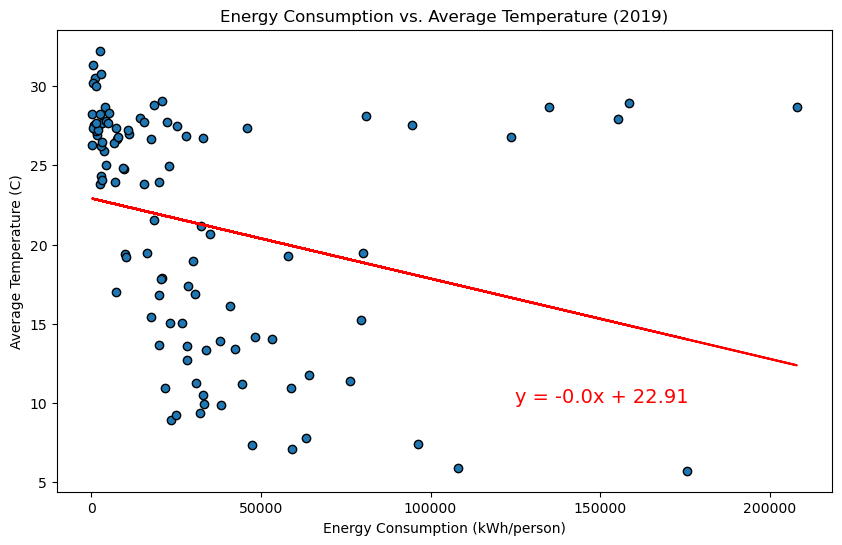

In [4]:
#scatter plot showing the correlation between temp and primary energy consumption
energy_consumption = main_data["Primary energy consumption per capita (kWh/person)"]
temperature = main_data["Average Temp"]

plt.figure(figsize=(10,6))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 10), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019).png")

# Show plot
plt.show()

Analysis: The is a no/very weak correlation between energy consumption and average temperature with entire data.

In [5]:
#create two data frames (high and low temperatures)

high_temps = main_data.loc[main_data['Average Temp'] >= 25]
low_temps = main_data.loc[main_data['Average Temp'] <= 10]


The r-squared is: 0.0028583229372739416


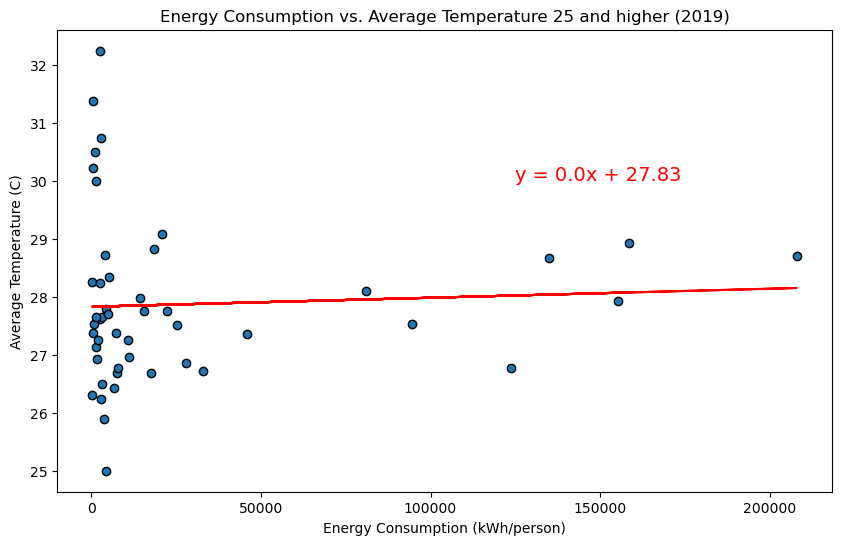

In [6]:
#scatter plot showing the correlation between temp and primary energy consumption in high temp 
energy_consumption = high_temps["Primary energy consumption per capita (kWh/person)"]
temperature = high_temps["Average Temp"]

plt.figure(figsize=(10,6))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 25 and higher (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 30), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 25 and higher (2019).png")

# Show plot
plt.show()

Analysis: There is no correlation between energy consumption and countries with average temperatures 25 and higher.

The r-squared is: 0.7053782565845196


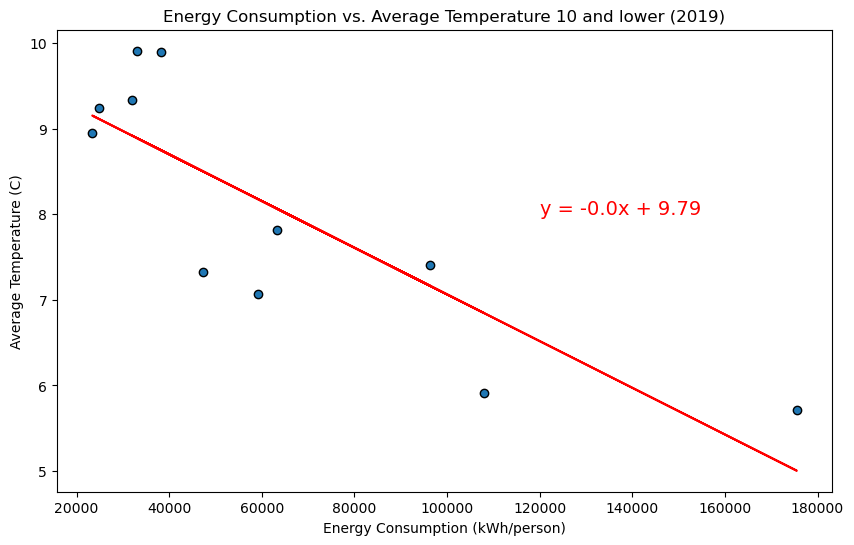

In [7]:
#scatter plot showing the correlation between temp and primary energy consumption in low temp 
energy_consumption = low_temps["Primary energy consumption per capita (kWh/person)"]
temperature = low_temps["Average Temp"]

plt.figure(figsize=(10,6))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 10 and lower (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (120000, 8), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 10 and lower (2019).png")

# Show plot
plt.show()

Analysis: There is a moderate/strong correlation between energy consumption and countries with an average temperature of 10 or lower.

In [8]:
#find outliers within the data
energyoutliers = main_data["Primary energy consumption per capita (kWh/person)"]
quartiles = energyoutliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

main_data_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] >= 88321.71742500001]
outliers = main_data_outliers['Country'].to_list()
print(f"{outliers} could be outliers.")

The lower quartile of temperatures is: 4599.5175500000005
The upper quartile of temperatures is: 38088.3975
The interquartile range of temperatures is: 33488.87995
The the median of temperatures is: 20460.55 
Values below -45633.802375 could be outliers.
Values above 88321.71742500001 could be outliers.
['Bahrain', 'Canada', 'Iceland', 'Kuwait', 'Norway', 'Qatar', 'Singapore', 'Trinidad and Tobago', 'United Arab Emirates'] could be outliers.


The r-squared is: 0.40616752081275864


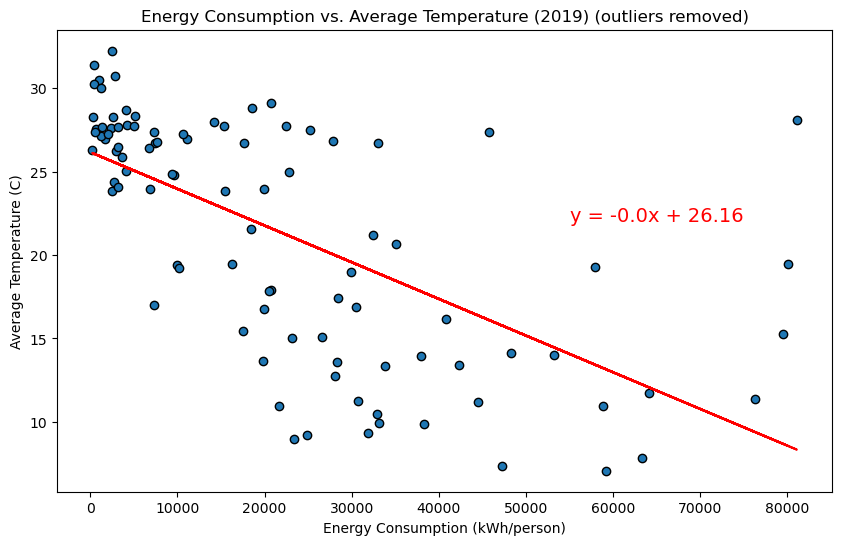

In [9]:
#remove outliers and complete new linear regression plot
main_data_no_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] < 88321.71742500001]

energy_consumption = main_data_no_outliers["Primary energy consumption per capita (kWh/person)"]
temperature = main_data_no_outliers["Average Temp"]

plt.figure(figsize=(10,6))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019) (outliers removed)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (55000, 22), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019) - no outliers.png")

# Show plot
plt.show()

Analysis: There is a weak correlation between energy consumption and average temperature, after removing outliers.

KHADIJA

In [10]:
%%capture --no-display

# Configure the map plot
map_plot_2 = main_data.hvplot.points("Longitude","Latitude", geo = True, tiles = "OSM", frame_width=800, frame_height=400, size="Low-carbon electricity (% electricity)", scale=2, color="Country")

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Low-carbon electricity (% electricity))

In [11]:

# Find the country with the highest temperature
country_with_highest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].max()]

# Get the low-carbon electricity percentage for the country with the highest temperature
low_carbon_percentage_highest_temp = country_with_highest_temp['Low-carbon electricity (% electricity)'].values[0]

# Find the country with the lowest temperature
country_with_lowest_temp = main_data[main_data['Average Temp'] == main_data['Average Temp'].min()]

# Get the low-carbon electricity percentage for the country with the lowest temperature
low_carbon_percentage_lowest_temp = country_with_lowest_temp['Low-carbon electricity (% electricity)'].values[0]

# Print the results
print(f'The low carbon electricity percentage in the country with the highest temperature is {low_carbon_percentage_highest_temp:.2f}%')
print(f'The low carbon electricity percentage in the country with the lowest temperature is {low_carbon_percentage_lowest_temp:.2f}%')

The low carbon electricity percentage in the country with the highest temperature is 63.34%
The low carbon electricity percentage in the country with the lowest temperature is 100.00%


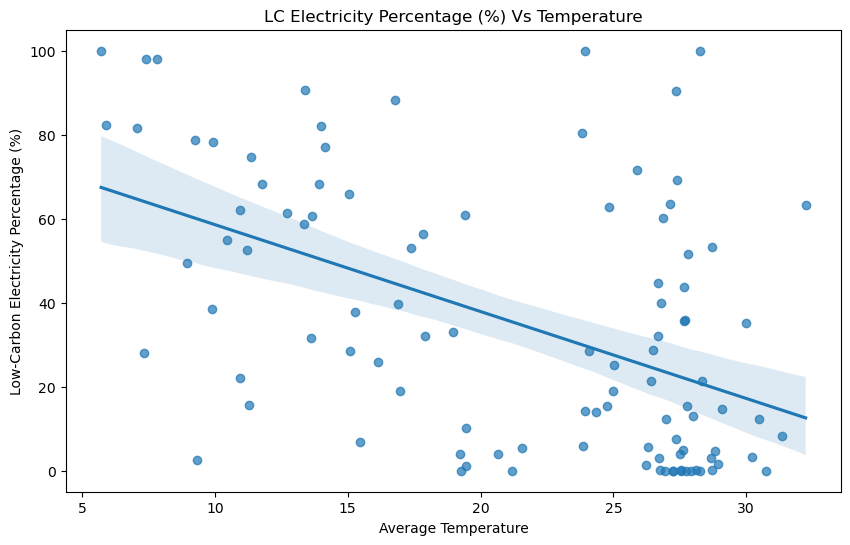

In [12]:
# Create a scatter plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=main_data['Average Temp'], y=main_data['Low-carbon electricity (% electricity)'], scatter_kws={'alpha':0.7})
plt.xlabel('Average Temperature')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('LC Electricity Percentage (%) Vs Temperature')
#plt.grid(True)

# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-scaterPlot.png")

plt.show()


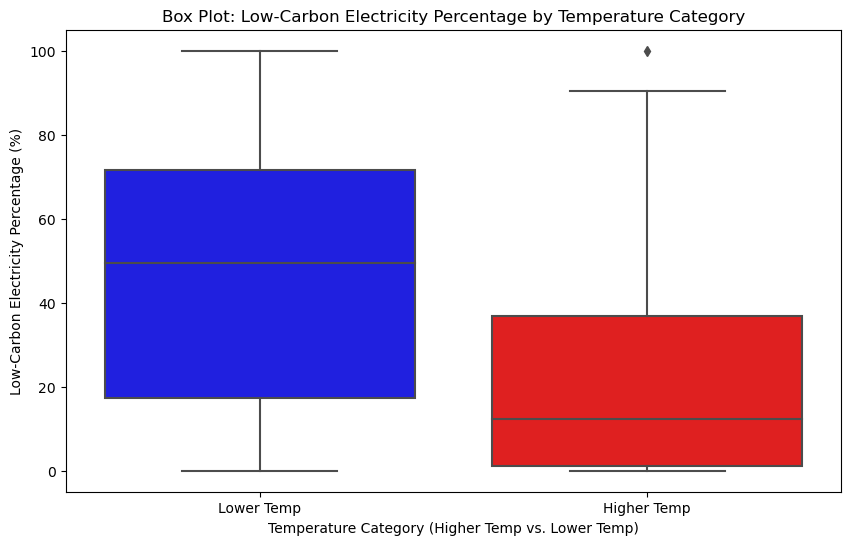

In [13]:
# Create a box plot to compare low-carbon electricity percentage by temperature category
plt.figure(figsize=(10, 6))
sns.boxplot(x=main_data['Average Temp'] > 25, y=main_data['Low-carbon electricity (% electricity)'], palette=['blue', 'red'])
plt.xlabel('Temperature Category (Higher Temp vs. Lower Temp)')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Box Plot: Low-Carbon Electricity Percentage by Temperature Category')
plt.xticks([0, 1], ['Lower Temp', 'Higher Temp'])

# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-BoxPlot.png")

plt.show()

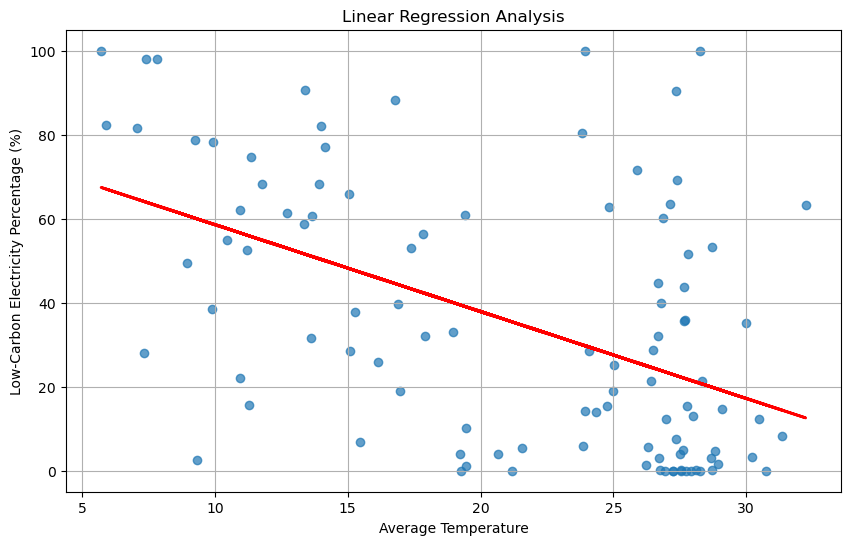

Slope (Coefficient): -2.0688
Intercept: 79.2755


In [14]:
# Define the independent variable (X) and dependent variable (y)
X = main_data['Average Temp']
y = main_data['Low-carbon electricity (% electricity)']

# Calculate the coefficients (slope and intercept) using numpy's polyfit
coefficients = np.polyfit(X, y, deg=1)

# Create the regression line
regression_line = coefficients[0] * X + coefficients[1]

# Plot the main_data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, regression_line, color='red', linewidth=2)
plt.xlabel('Average Temperature')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Linear Regression Analysis')
plt.grid(True)

# Save the figure
plt.savefig("output_data/LC-Electricity(%)&Temperature-linear-regression.png")

plt.show()

# Print the coefficients
slope, intercept = coefficients
print(f'Slope (Coefficient): {slope:.4f}')
print(f'Intercept: {intercept:.4f}')


In [15]:
# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)

# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)

# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
result_df.head(20)


,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,39,Iceland,5.715385,81.07,0.00,0.00,19.12,100.000000,175527.73000,1640.0,64.963051,-19.020835,366669,142300.330711
1,14,Canada,5.912088,22.11,110.65,95.47,421.80,82.378334,107980.76000,580210.0,56.130366,-106.346771,37888705,23874.546036
2,28,Finland,7.070604,45.76,12.63,23.87,31.88,81.529690,59219.41800,40710.0,61.924110,25.748151,5529468,27098.805677
3,26,Estonia,7.326648,31.29,5.47,0.00,2.14,28.120895,47295.33600,10180.0,58.595272,25.013607,1329444,14798.710634
4,67,Norway,7.402473,62.37,2.76,0.00,131.07,97.937690,96392.50000,35950.0,60.472024,8.468946,5379839,60120.002250
5,90,Sweden,7.812948,52.88,3.35,66.13,98.94,98.010925,63283.47000,35000.0,60.128161,18.643501,10368969,33464.298936
6,49,Latvia,8.948485,41.52,3.25,0.00,3.19,49.534160,23394.70000,7570.0,56.879635,24.603189,1897052,9713.479440
7,52,Lithuania,9.236264,33.53,0.67,0.00,2.47,78.662415,24873.11700,11730.0,55.169438,23.881275,2820267,8339.956130
8,9,Belarus,9.339286,7.83,36.74,0.00,0.94,2.494692,31923.43600,57670.0,53.709807,27.953389,9633740,2499.605039
9,42,Ireland,9.892857,12.34,18.92,0.00,11.80,38.411460,38270.87500,35750.0,53.412910,-8.243890,4946119,4722.625975


In [16]:
#to get just the 3 data informations :country ,Average Temp ,Low-carbon electricity (% electricity)

# Sort the main_data by 'Average Temp' in ascending order to get the lowest temperature countries
lowest_temp_countries = main_data.sort_values(by='Average Temp', ascending=True).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
print (lowest_temp_countries)
# Sort the main_data by 'Average Temp' in descending order to get the highest temperature countries
highest_temp_countries = main_data.sort_values(by='Average Temp', ascending=False).head(10)[['Country', 'Average Temp', 'Low-carbon electricity (% electricity)']]
print (highest_temp_countries)
# Concatenate the two main_dataFrames to get the final result
result_df = pd.concat([lowest_temp_countries, highest_temp_countries])

# Reset the index of the resulting main_dataFrame
result_df.reset_index(drop=True, inplace=True)

# Display the result main_dataFrame
print(result_df)

      Country  Average Temp  Low-carbon electricity (% electricity)
39    Iceland      5.715385                              100.000000
14     Canada      5.912088                               82.378334
28    Finland      7.070604                               81.529690
26    Estonia      7.326648                               28.120895
67     Norway      7.402473                               97.937690
90     Sweden      7.812948                               98.010925
49     Latvia      8.948485                               49.534160
52  Lithuania      9.236264                               78.662415
9     Belarus      9.339286                                2.494692
42    Ireland      9.892857                               38.411460
         Country  Average Temp  Low-carbon electricity (% electricity)
89         Sudan     32.239286                               63.335380
66         Niger     31.365934                                8.196721
22      Djibouti     30.737912         

Analysis : the coldest country are Iceland, canada,finland and others  are all Iceland, and the uses of Low carbon electricity pourcentage is very hight above belarus and estonia ,irland 

In [17]:
# Perform Linear Regression Analysis
# For Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)

# For Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)

# For All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], deg=1)

# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.4f}")

# Show the plots
plt.tight_layout()
plt.show()

Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044
Linear Regression for All Countries: Slope (Coefficient) = -2.0688


<Figure size 640x480 with 0 Axes>

Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = -13.9328
Linear Regression for Highest Temperature Countries: Slope (Coefficient) = 4.6044
Linear Regression for All Countries: Slope (Coefficient) = -2.07


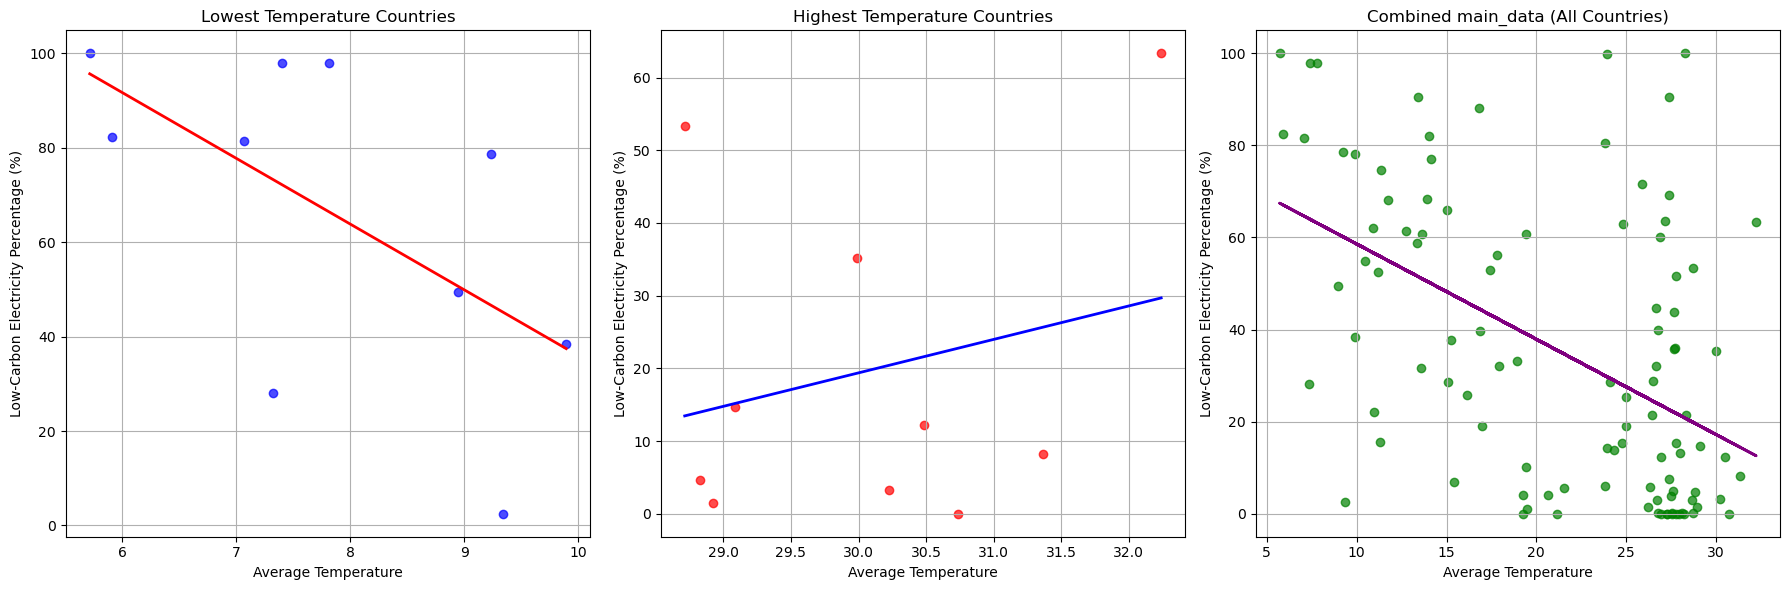

In [18]:
# Create subplots for the visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualization 1: Scatter Plot for Lowest Temperature Countries
axes[0].scatter(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='blue')
axes[0].set_xlabel('Average Temperature')
axes[0].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[0].set_title('Lowest Temperature Countries')
axes[0].grid(True)

# Perform Linear Regression for Lowest Temperature Countries
coefficients_low_temp = np.polyfit(lowest_temp_countries['Average Temp'], lowest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_low_temp = coefficients_low_temp[0] * lowest_temp_countries['Average Temp'] + coefficients_low_temp[1]
axes[0].plot(lowest_temp_countries['Average Temp'], regression_line_low_temp, color='red', linewidth=2)
# Save the figure
plt.savefig("output_data/Scatter-Plot-with-linear-regression-for-Lowest-Temperature-Countries.png")
# Visualization 2: Scatter Plot for Highest Temperature Countries
axes[1].scatter(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], alpha=0.7, color='red')
axes[1].set_xlabel('Average Temperature')
axes[1].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[1].set_title('Highest Temperature Countries')
axes[1].grid(True)

# Perform Linear Regression for Highest Temperature Countries
coefficients_high_temp = np.polyfit(highest_temp_countries['Average Temp'], highest_temp_countries['Low-carbon electricity (% electricity)'], deg=1)
regression_line_high_temp = coefficients_high_temp[0] * highest_temp_countries['Average Temp'] + coefficients_high_temp[1]
axes[1].plot(highest_temp_countries['Average Temp'], regression_line_high_temp, color='blue', linewidth=2)
# Save the figure
plt.savefig("output_data/Scatter-Plot-with-linear-regression-for-highest-Temperature-Countries.png")
# Visualization 3: Combined Scatter Plot for All Countries
axes[2].scatter(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], alpha=0.7, color='green')
axes[2].set_xlabel('Average Temperature')
axes[2].set_ylabel('Low-Carbon Electricity Percentage (%)')
axes[2].set_title('Combined main_data (All Countries)')
axes[2].grid(True)

# Perform Linear Regression for All Countries
coefficients_all = np.polyfit(main_data['Average Temp'], main_data['Low-carbon electricity (% electricity)'], deg=1)
regression_line_all = coefficients_all[0] * main_data['Average Temp'] + coefficients_all[1]
axes[2].plot(main_data['Average Temp'], regression_line_all, color='purple', linewidth=2)
# Save the figure
plt.savefig("output_data/Combined-Scatter-Plot-with-linear-regression-for-All-Countries.png")
# Print the regression coefficients
print(f"Linear Regression for Lowest Temperature Countries: Slope (Coefficient) = {coefficients_low_temp[0]:.4f}")
print(f"Linear Regression for Highest Temperature Countries: Slope (Coefficient) = {coefficients_high_temp[0]:.4f}")
print(f"Linear Regression for All Countries: Slope (Coefficient) = {coefficients_all[0]:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

Analyse :the analysis indicates that temperature can be a factor influencing the choice of electricity sources in different countries. Colder countries(-13.93) tend to rely more on low-carbon electricity sources, while hotter countries (4.60) in this group tend to use more low-carbon electricity sources


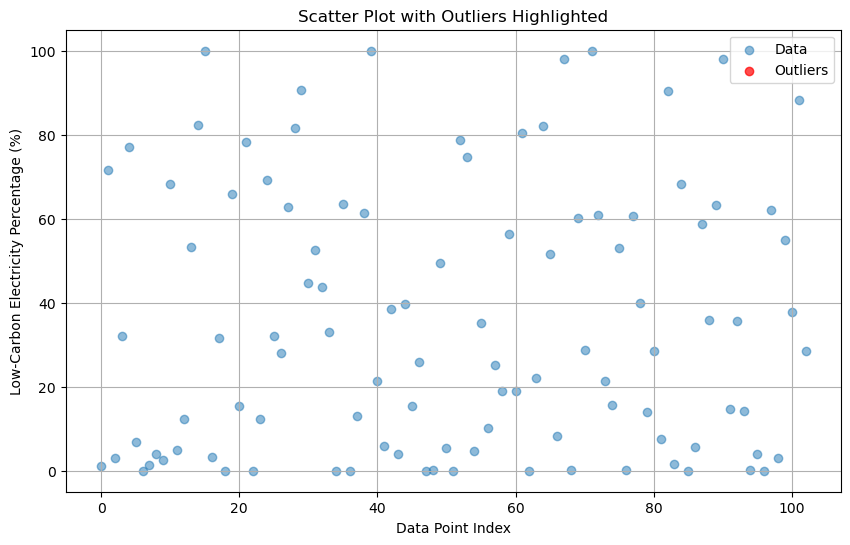

In [19]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = main_data['Low-carbon electricity (% electricity)'].quantile(0.25)
Q3 = main_data['Low-carbon electricity (% electricity)'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = main_data[(main_data['Low-carbon electricity (% electricity)'] < lower_bound) | (main_data['Low-carbon electricity (% electricity)'] > upper_bound)]

# Create a scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(main_data.index, main_data['Low-carbon electricity (% electricity)'], label='Data', alpha=0.5)
plt.scatter(outliers.index, outliers['Low-carbon electricity (% electricity)'], color='red', label='Outliers', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Low-Carbon Electricity Percentage (%)')
plt.title('Scatter Plot with Outliers Highlighted')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("output_data/Scatter Plot with Outliers Highlighted.png")

# Show the plot
plt.show()


there are no outliers in this dataset